### Here I calculate the Chern number using Fukui-Hatsugai method and then calculate the Bott Index. Both produce the same phase diagram

**phase diagram reprodces Fig. S2 of SI of arxiv:2305.16313v1**

### Here I am using $\sigma_i$ instead of $\Gamma_i$, because $\Gamma_i$ produces two copies with opposite Chern number, producing net Chern number zero

In [1]:
using LinearAlgebra
using Plots
using LaTeXStrings
using CSV
using DataFrames
#plotlyjs()

In [2]:
sigma_x = [0 1;
           1 0];
sigma_y = [0 -im;
           im 0];
sigma_z = [1 0;
           0 -1];
eye2 = [1 0;
        0 1];

gamma_1 = kron(sigma_x, sigma_x);
gamma_2 = kron(sigma_x, sigma_y);
gamma_3 = kron(sigma_x, sigma_z);

exportdata=1;

In [3]:
function H0(px::Float64,py::Float64,t::Float64,t_prime::Float64,m_0::Float64)
    return  t*kron((sin(px) + cos(px)*sin(py)),sigma_x) + t*kron(sin(py)+sin(px)*cos(py),sigma_y) + kron((m_0-2*t_prime) + t0*(cos(px) + cos(py)) + 2*t_prime*cos(px)*cos(py),sigma_z)
end

H0 (generic function with 1 method)

In [4]:
NBands = 2;
NGridpts = 31;

plim = pi
px_array = range(-plim,plim,NGridpts);
py_array = range(-plim,plim,NGridpts);

band = zeros(NBands,NGridpts,NGridpts)*im;
low_energy_eigenvec = zeros(NBands,NGridpts,NGridpts)*im; #This ensures that the vector can accept complex values
vec=zeros(NBands,NBands)*im;
berry_curv=zeros(NGridpts,NGridpts)*im;

t0 = 1.0;
tt = 1.0;

Nplotpts = 161;
t_prime_array = range(-1.4,1.4,Nplotpts);
m0_array = range(-3.2,3.2,Nplotpts);

Chern_array = zeros(Nplotpts,Nplotpts);
Bott_index_array = zeros(Nplotpts,Nplotpts);

results1 = DataFrame(m_0=Float64[], t_prime=Float64[], Chern_number=Float64[]);

In [5]:
for iii=1:Nplotpts
    @time for jjj=1:Nplotpts

## Here I calculate the band energy for each (px,py) and find the eigenvector of the valence band
for ii = 1:NGridpts
    for jj = 1:NGridpts
        #if(ishermitian(H0(px_array[ii],py_array[jj],1.0,1.0,1.0))==false)
        #    println(ii)
        #    println(jj)
        #end
        band[:,ii,jj],vec=eigen(H0(px_array[ii],py_array[jj],tt,t_prime_array[iii],m0_array[jjj]));
        low_energy_eigenvec[:,ii,jj] = vec[:,2];
    end
end

for ii = 1:(NGridpts-1)#Just to get rid of boundary term
    for jj = 1:(NGridpts-1)
        a=0.0*im;
        a = (low_energy_eigenvec[:,ii,jj+1]'*low_energy_eigenvec[:,ii,jj])*(low_energy_eigenvec[:,ii,jj]'*low_energy_eigenvec[:,ii+1,jj])*(low_energy_eigenvec[:,ii+1,jj]'*low_energy_eigenvec[:,ii+1,jj+1])*(low_energy_eigenvec[:,ii+1,jj+1]'*low_energy_eigenvec[:,ii,jj+1])
        berry_curv[ii,jj] = imag(log(a/abs(a)))
    end
end

Chern_Number = sum(x -> !isnan(x) ? x : 0, real(berry_curv))/(2*pi)

Chern_array[jjj,iii] = Chern_Number
push!(results1, (m0_array[jjj], t_prime_array[iii], Chern_Number))

end
println(iii)
end

 14.364138 seconds (18.77 M allocations: 996.307 MiB, 8.39% gc time, 72.96% compilation time)
1
  3.158831 seconds (14.33 M allocations: 769.147 MiB, 7.01% gc time)
2
  3.477312 seconds (14.33 M allocations: 769.131 MiB, 6.23% gc time)
3
  3.595332 seconds (14.33 M allocations: 769.145 MiB, 6.34% gc time)
4
  3.334079 seconds (14.33 M allocations: 769.190 MiB, 6.53% gc time)
5
  4.355744 seconds (14.33 M allocations: 769.148 MiB, 6.01% gc time)
6
  3.751534 seconds (14.33 M allocations: 769.148 MiB, 6.52% gc time)
7
  4.215301 seconds (14.33 M allocations: 769.148 MiB, 6.21% gc time)
8
  4.392602 seconds (14.33 M allocations: 769.148 MiB, 6.24% gc time)
9
  3.921931 seconds (14.33 M allocations: 769.148 MiB, 6.07% gc time)
10
  3.704465 seconds (14.33 M allocations: 769.148 MiB, 6.06% gc time)
11
  3.744205 seconds (14.33 M allocations: 769.242 MiB, 6.27% gc time)
12
  3.668825 seconds (14.33 M allocations: 769.148 MiB, 6.05% gc time)
13
  2.864862 seconds (14.33 M allocations: 769.148

In [6]:
# Define the folder path (relative or absolute)
folder_path = "data/hstci/"  # Change to your desired folder
# Ensure the folder exists
isdir(folder_path) || mkdir(folder_path)

isdir(string(folder_path,"phase_diagram/")) || mkdir(string(folder_path,"phase_diagram/"))


# Define the folder path (relative or absolute)
folder_path = "data/hstci/"  # Change to your desired folder
# Ensure the folder exists
isdir(folder_path) || mkdir(folder_path)

filename = "t0=$(t0)_t=$(tt)_NGridPts=$(NGridpts)_Nplotpts=$(Nplotpts)"

if exportdata==1
    CSV.write(string(folder_path,"phase_diagram/",filename,"_band1.csv"), results1, writeheader=false)
end

"data/hstci/phase_diagram/t0=1.0_t=1.0_NGridPts=31_Nplotpts=161_band1.csv"

In [7]:
m0_array[50],t_prime_array[45],Chern_array[50,45]

(-1.24, -0.63, -1.0000000000000009)

Note: It has to be Chern_array'. Somehow it is plotted in the opposite way.

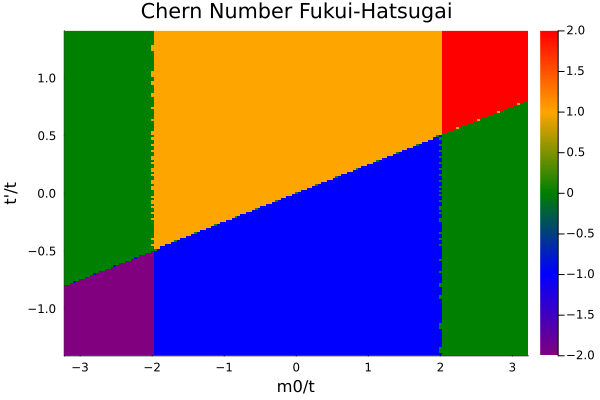

In [8]:
heatmap(m0_array, t_prime_array, Chern_array', color = :rainbow, xlabel="m0/t", ylabel="t'/t", title="Chern Number Fukui-Hatsugai")


### Calculation of Bott Index

In [9]:
include("generate_matrices2D.jl")

generate_matrices_2D (generic function with 1 method)

In [10]:
t0 = 1.0;
Lx=10;
Ly=10;

const_2D, CX2D, SX2D, CY2D, SY2D, CXCY2D, SXCY2D, CXSY2D = generate_matrices_2D(Lx,Ly,1,1)
xarray2D = kron(kron(range(1,1,Ly),range(1,Lx,Lx)), [1,1])
yarray2D = kron(kron(range(1,Ly,Ly), range(1,1,Lx)), [1,1])

U_x = diagm(exp.(2 * pi * im * xarray2D/Lx));
V_y = diagm(exp.(2 * pi * im * yarray2D/Ly));

results2 = DataFrame(m_0=Float64[], t_prime=Float64[], Bott_index=Float64[]);

Verified: Building Block Matrices are Hermitian


In [11]:
function BottIndexHalfFilled_hscti(t::Float64, t_prime::Float64, m0::Float64)
    h_scti = t*kron((SX2D + CXSY2D),sigma_x) + t*kron(SY2D+SXCY2D,sigma_y) + kron((m0-2*t_prime)*const_2D + t0*(CX2D + CY2D) + 2*t_prime*CXCY2D,sigma_z)

    (energy_eigenvalues, eigenstates) = eigen(h_scti);

    filled_eigenstates = eigenstates[:,1:Lx*Ly]

    P = conj(filled_eigenstates) * transpose(filled_eigenstates)

    U = P * U_x * P + (kron(const_2D,eye2) - P);
    V = P * V_y * P + (kron(const_2D,eye2) - P);
    bott = U * V * U' * V'

    bott_index = real((-im/(2*pi)) * sum(log.(eigvals(bott))))
    return bott_index
end

BottIndexHalfFilled_hscti (generic function with 1 method)

In [ ]:
for iii=1:Nplotpts
    println("iii=",iii)
    @time for jjj=1:Nplotpts
        Bott_index_array[iii,jjj] = BottIndexHalfFilled_hscti(1.0, t_prime_array[jjj], m0_array[iii])
    end
end

iii=1
 20.056119 seconds (7.27 M allocations: 2.765 GiB, 2.48% gc time, 28.68% compilation time)
iii=2
 14.225996 seconds (26.41 k allocations: 2.407 GiB, 2.28% gc time)
iii=3
 17.226024 seconds (26.41 k allocations: 2.407 GiB, 1.98% gc time)
iii=4
 15.110185 seconds (26.41 k allocations: 2.407 GiB, 2.23% gc time)
iii=5
 15.237233 seconds (26.41 k allocations: 2.407 GiB, 2.21% gc time)
iii=6
 13.601802 seconds (26.41 k allocations: 2.407 GiB, 2.29% gc time)
iii=7
 14.210716 seconds (26.41 k allocations: 2.407 GiB, 2.25% gc time)


In [ ]:
Bott_index_array

In [ ]:
heatmap(m0_array, t_prime_array, Bott_index_array', color = :rainbow, xlabel="m0/t", ylabel="t'/t", title="Bott index")

In [ ]:
# Define the folder path (relative or absolute)
folder_path = "data/hstci/"  # Change to your desired folder
# Ensure the folder exists
isdir(folder_path) || mkdir(folder_path)

isdir(string(folder_path,"bott_index/")) || mkdir(string(folder_path,"bott_index/"))


# Ensure the folder exists
isdir(folder_path) || mkdir(folder_path)

filename = "t0=$(t0)_t=$(tt).csv"

if exportdata==1
    CSV.write(string(folder_path,"bott_index/",filename,"_band1.csv"), results1, writeheader=false)
end